In [89]:
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [90]:
# fix random seed for reproducibility
seed = 42 # 7
np.random.seed(seed)

In [105]:
# load star/quasar dataset
from pandas import read_csv
dataset = read_csv("/Users/toast/Dropbox/Github/ml-dias/data/sdss_photo.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[['u-g','g-r','r-i','i-z']]
y = dataset['target']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [106]:
print(X.shape)
print(np.unique(y))

(867, 4)
[0 1]


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [108]:
print(X_train.shape, X_test.shape)

(606, 4) (261, 4)


In [109]:
input_dim = X.shape[1]

In [120]:
# create model
def createModel(input_dim):
    model = Sequential()
# kernel_initializer='uniform'
# kernel_regularizer=regularizers.l1(0.01)
    model.add(Dense(12, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='relu'))
    model.add(Dropout(0.5))

###    model.add(Dense(2, kernel_initializer='uniform', activation='softmax'))

    model.add(Dense(1, activation='sigmoid'))
    return model

model = createModel(input_dim)
# Compile model
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [121]:
# Checkpoint the weights for best model on validation accuracy
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')
# try verbose=1
callbacks_list = [checkpoint]

In [122]:
# Fit the model
# model.fit(X, y, validation_split=0.33, epochs=250, batch_size=10, callbacks=callbacks_list, verbose=0)
model.fit(X_train, y_train,
          validation_data=(X_test, y_test), 
          epochs=1000, 
          batch_size=100, 
          callbacks=callbacks_list, 
          verbose=0)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


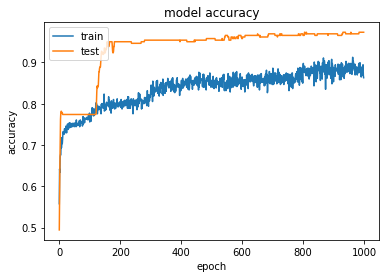

In [123]:
# list all data in history
history = model.history.history
print(history.keys())
# summarize history for accuracy
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

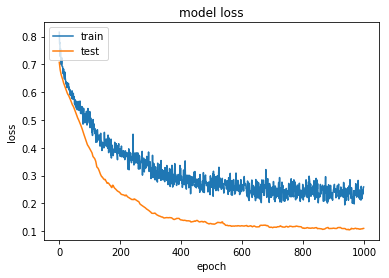

In [124]:
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [125]:
# estimate accuracy on test dataset using final weights
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 97.32%


In [126]:
# and how to load it
np.random.seed(seed)
model = createModel(input_dim)
# load weights
model.load_weights("weights.best.hdf5")
# Compile model (required to make predictions)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")

Created model and loaded weights from file


In [127]:
# estimate accuracy on test dataset using loaded weights
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 97.32%


In [128]:
# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 98.27%


In [129]:
## !rm weights.best.hdf5